Surge from tropical cyclones modeled with GeoClaw
=================================================
Major damages from tropical cyclones (TC) are caused by coastal flooding from storm surge. Those damages are badly represented when using only windfields as a predictor. CLIMADA's `TCSurgeGeoClaw` class employs the geophysical flow solver [GeoClaw](http://www.clawpack.org/geoclaw) to predict TC surge damages at a resolution of up to 30 arc-seconds (600-900 meters, depending on latitude). For more information about GeoClaw, please refer to [the official web page](http://www.clawpack.org/geoclaw) and to the following publications:

* Berger, M. J., George,  D. L., LeVeque, R. J. and Mandli. K. M.: *The GeoClaw software for depth-averaged flows with adaptive refinement*, Advances in Water Resources 34 (2011), pp. 1195-1206. [DOI](https://doi.org/10.1016/j.advwatres.2011.02.016)
* Mandli, K. T. & Dawson, C. N.: *Adaptive Mesh Refinement for Storm Surge*. Ocean Modelling 75, 36–50 (2014). [DOI](https://doi.org/10.1016/j.ocemod.2014.01.002)

Performance warning
-------------------
Even though GeoClaw uses an efficient adaptive mesh refinement to model wave dynamics in the 2d depth-averaged shallow water equations, modeling storm surge is the computationally most challenging task included in CLIMADA. Computing the inundated areas from a single tropical cyclone might take between minutes and hours depending on the storm and the host machine's resources.

Input data
----------
Three kinds of input data are required by `TCSurgeGeoClaw`: storm track, sea level and topographic data. CLIMADA's `TCTracks` class handles several kinds of TC track datasets, including best track data from the IBTrACS dataset of historical tropical cyclones. Sea level and topographic data have to be provided by the user in raster file format.

Since the quality of any storm surge model is dependent on good topographic data in coastal areas, it is highly recommended to choose the best regionally available **digital elevation model (DEM)** on a case-by-case basis instead of global DEMs such as SRTM. Note that, in this context, topography also includes bathymetry or underwater topography (sea floor). Bathymetry of sufficient quality is available as [SRTM15+V2.0](https://figshare.com/projects/SRTM15_V2_0/62045) or [GEBCO Gridded Bathymetry](https://www.gebco.net/data_and_products/gridded_bathymetry_data/). High-quality coastal DEM data is provided for the US coast by the [CoNED project](https://www.usgs.gov/land-resources/eros/coned). A global dataset with focus on coastal areas is [CoastalDEM](https://go.climatecentral.org/coastaldem/), but users should always consider regionally available sources on a case-by-case basis for better results. Note that, if several DEM datasets are combined, all of them need to be translated to the same reference geoid (so-called vertical datum)!

The most severe damages from TC storm surge are caused by a combination of high seasonal tides and waves driven by TC winds. That's why `TCSurgeGeoClaw` requires **monthly gridded sea surface height data** as an input. A monthly temporal resolution is required in order to take into account seasonal variability. The dataset must contain sea surface anomaly relative to a reference geoid. Make sure that the reference geoid is compatible with the reference geoid/vertical datum used in the DEM input. For the period 1993-2018, monthly sea surface anomaly data from satellite altimetry is provided by the [Copernicus project](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=GLOBAL_REANALYSIS_PHY_001_030).

In [1]:
# Choose project-specific sea level and topographic datasets

# sea level anomaly is taken from the Copernicus satellite altimetry
ZOS_PATH = "monthly_zos.nc"

# we combined SRTM15+V2.0 bathymetry with CoNED data in coastal areas, stored in a single GeoTIFF with 3 arc-seconds resolution
TOPO_PATH = "dem/combine.vrt"

2020-08-19 13:13:07,594 - climada - DEBUG - Loading default config file: /home/tovogt/code/climada_python/climada/conf/defaults.conf


/home/tovogt/code/climada_python/climada/util/plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


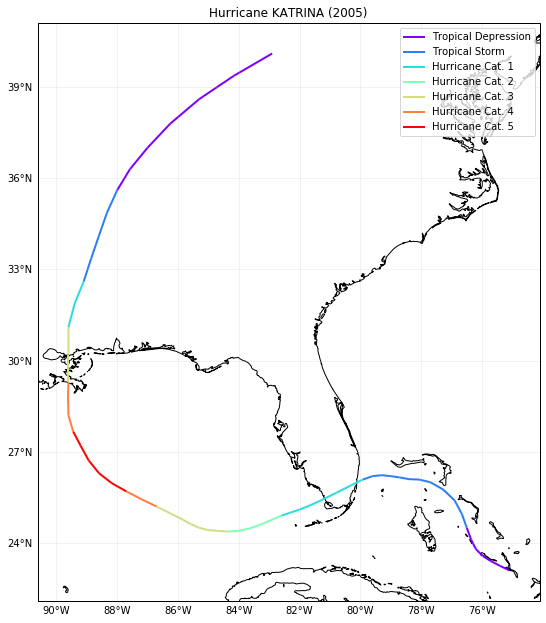

In [2]:
# storm track data is taken from IBTrACS
from climada.hazard.tc_tracks import TCTracks

tracks = TCTracks()
tracks.read_ibtracs_netcdf(storm_id="2005236N23285") 
tracks.plot().set_title('Hurricane KATRINA (2005)');

Running the GeoClaw surge model from CLIMADA
--------------------------------------------
For each run of GeoClaw, a working directory is created in `data/geoclaw/runs` in the CLIMADA source directory. Before the GeoClaw solver is run, the storm is analysed to predict which coastal areas are expected to be affected by the storm's surge. Furthermore, if a single storm involves multiple landfall events, each landfall event is modeled in a separate GeoClaw run.

The geographical areas of landfall are plotted and saved to a file `event_areas.pdf` in the working directory (also plotted inline below). Furthermore, plots of the DEM data used for each GeoClaw run are generated and saved to files `dems.pdf` in subdirectories of the working directory (also plotted inline below).

2020-08-19 13:13:13,642 - climada.hazard.tc_surge_geoclaw - INFO - Found Clawpack version 5.6.1 in /home/tovogt/code/climada_python/data/geoclaw/src/clawpack-v5.7.0
2020-08-19 13:13:13,717 - climada.util.coordinates - INFO - Sampling from /home/tovogt/code/climada_python/data/system/GMT_intermediate_coast_distance_01d.tif
2020-08-19 13:13:14,339 - climada.hazard.tc_surge_geoclaw - INFO - Computing TC surge of 1 tracks on 132331 centroids.
2020-08-19 13:13:14,353 - climada.util.coordinates - INFO - Sampling from dem/combine.vrt
2020-08-19 13:13:22,110 - climada.hazard.tc_surge_geoclaw - INFO - Determine georegions and temporal periods of landfall events...


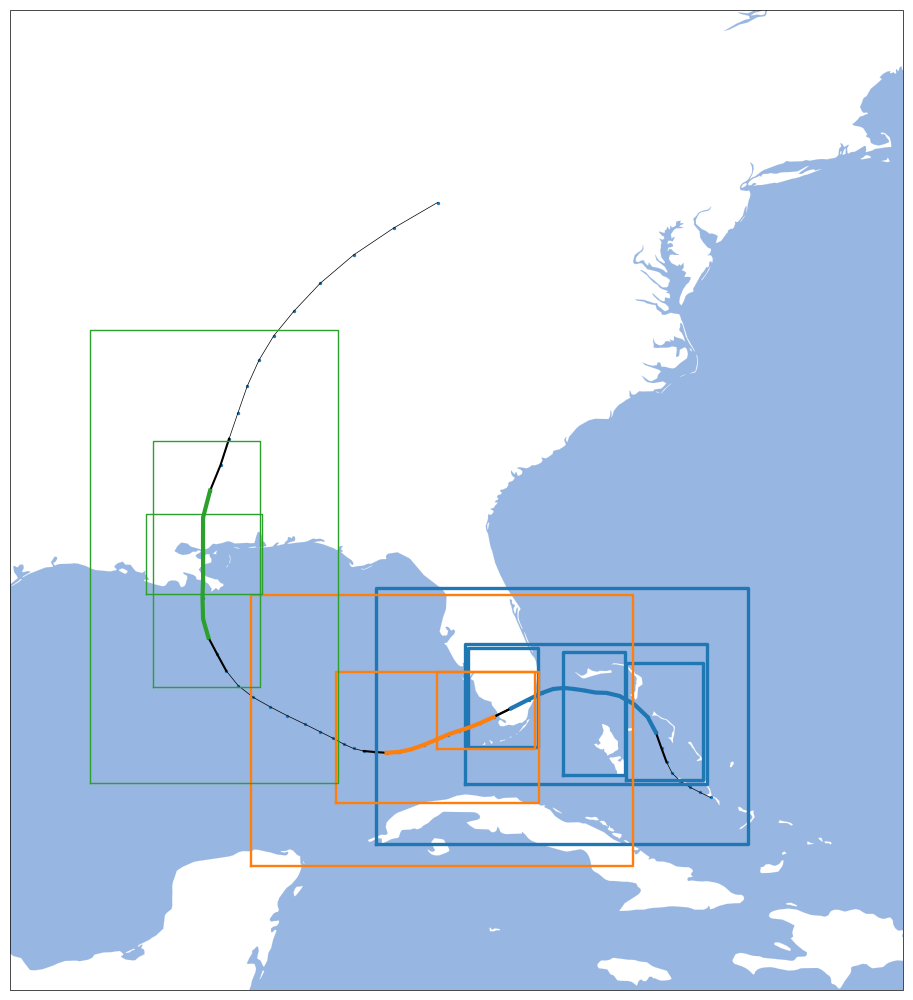

2020-08-19 13:13:28,849 - climada.hazard.tc_surge_geoclaw - INFO - Starting 3 runs of GeoClaw...
2020-08-19 13:13:28,852 - climada.hazard.tc_surge_geoclaw - INFO - Running GeoClaw to determine surge on 7850 centroids
2020-08-19 13:13:28,855 - climada.hazard.tc_surge_geoclaw - INFO - Init GeoClaw working directory in /home/tovogt/code/climada_python/data/geoclaw/runs/2020-08-19-13-13-22-2005236N23285/2005-08-24-15
2020-08-19 13:13:28,856 - climada.hazard.tc_surge_geoclaw - INFO - Found Clawpack version 5.6.1 in /home/tovogt/code/climada_python/data/geoclaw/src/clawpack-v5.7.0
2020-08-19 13:13:28,897 - climada.hazard.tc_surge_geoclaw - INFO - GeoClaw resolution in arc-seconds: ['957.64', '478.82', '239.41', '119.71', '59.85', '19.95']
2020-08-19 13:13:29,393 - climada.hazard.tc_surge_geoclaw - INFO - Load elevation data [360, (-84.66876983642578, 21.7829647064209, -74.02827453613281, 29.0869140625)] from dem/combine.vrt
2020-08-19 13:13:31,118 - climada.hazard.tc_surge_geoclaw - INFO - L

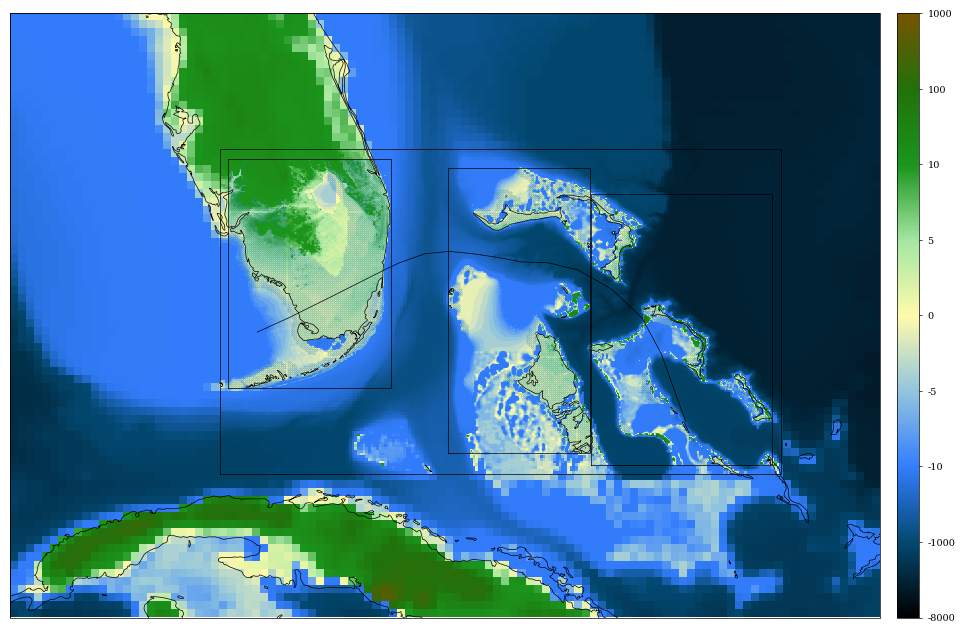

2020-08-19 13:13:33,436 - climada.hazard.tc_surge_geoclaw - INFO - Running GeoClaw...
2020-08-19 13:13:38,664 - climada.hazard.tc_surge_geoclaw - INFO - 0%
2020-08-19 13:29:24,424 - climada.hazard.tc_surge_geoclaw - INFO - 10%
2020-08-19 13:45:16,449 - climada.hazard.tc_surge_geoclaw - INFO - 20%
2020-08-19 14:01:19,267 - climada.hazard.tc_surge_geoclaw - INFO - 30%
2020-08-19 14:17:47,661 - climada.hazard.tc_surge_geoclaw - INFO - 40%
2020-08-19 14:34:13,511 - climada.hazard.tc_surge_geoclaw - INFO - 50%
2020-08-19 14:50:37,883 - climada.hazard.tc_surge_geoclaw - INFO - 60%
2020-08-19 15:06:37,389 - climada.hazard.tc_surge_geoclaw - INFO - 70%
2020-08-19 15:21:36,000 - climada.hazard.tc_surge_geoclaw - INFO - 80%
2020-08-19 15:36:02,812 - climada.hazard.tc_surge_geoclaw - INFO - 90%
2020-08-19 15:51:08,127 - climada.hazard.tc_surge_geoclaw - INFO - Reading GeoClaw output...
2020-08-19 15:51:08,194 - climada.hazard.tc_surge_geoclaw - INFO - Running GeoClaw to determine surge on 3984 ce

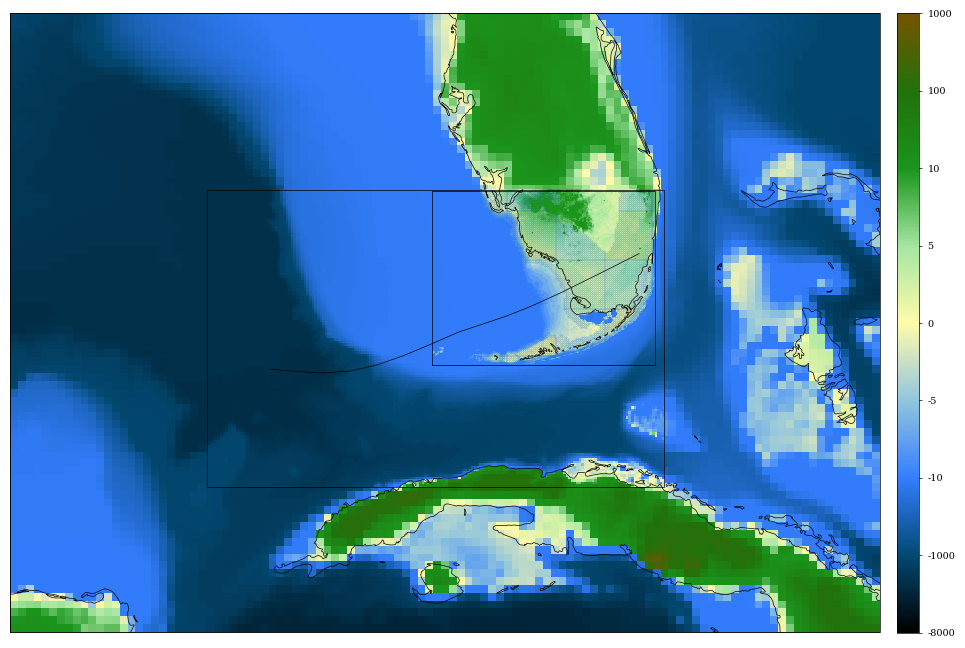

2020-08-19 15:51:12,037 - climada.hazard.tc_surge_geoclaw - INFO - Running GeoClaw...
2020-08-19 15:51:14,325 - climada.hazard.tc_surge_geoclaw - INFO - 0%
2020-08-19 15:52:38,421 - climada.hazard.tc_surge_geoclaw - INFO - 10%
2020-08-19 15:54:02,713 - climada.hazard.tc_surge_geoclaw - INFO - 20%
2020-08-19 15:55:26,781 - climada.hazard.tc_surge_geoclaw - INFO - 30%
2020-08-19 15:56:50,717 - climada.hazard.tc_surge_geoclaw - INFO - 40%
2020-08-19 15:58:14,346 - climada.hazard.tc_surge_geoclaw - INFO - 50%
2020-08-19 15:59:37,955 - climada.hazard.tc_surge_geoclaw - INFO - 60%
2020-08-19 16:01:01,440 - climada.hazard.tc_surge_geoclaw - INFO - 70%
2020-08-19 16:02:24,941 - climada.hazard.tc_surge_geoclaw - INFO - 80%
2020-08-19 16:03:48,321 - climada.hazard.tc_surge_geoclaw - INFO - 90%
2020-08-19 16:05:08,628 - climada.hazard.tc_surge_geoclaw - INFO - Reading GeoClaw output...
2020-08-19 16:05:08,666 - climada.hazard.tc_surge_geoclaw - INFO - Running GeoClaw to determine surge on 5449 ce

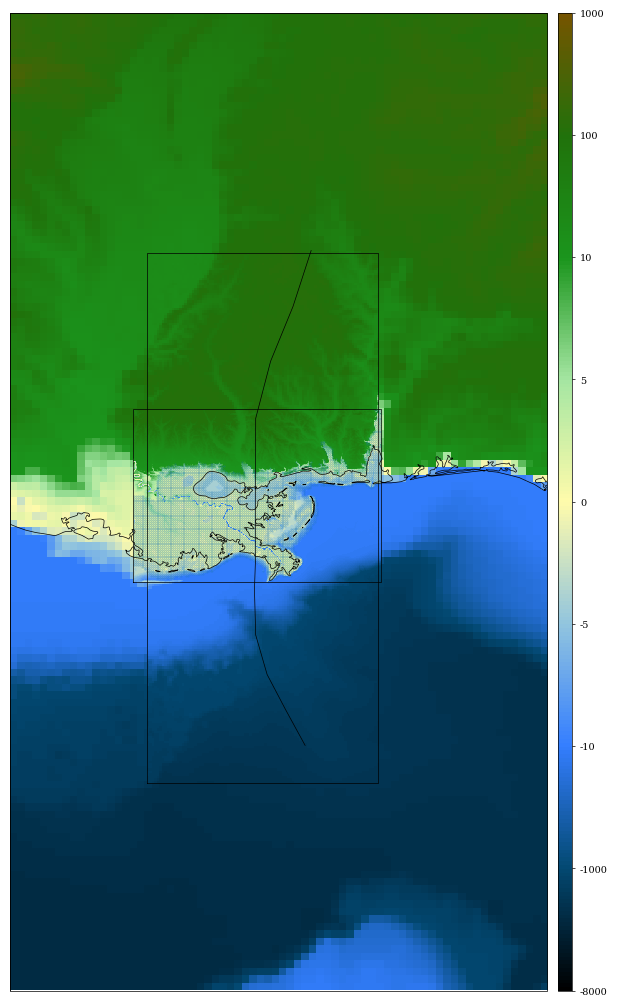

2020-08-19 16:05:12,818 - climada.hazard.tc_surge_geoclaw - INFO - Running GeoClaw...
2020-08-19 16:05:15,652 - climada.hazard.tc_surge_geoclaw - INFO - 0%
2020-08-19 16:07:36,460 - climada.hazard.tc_surge_geoclaw - INFO - 10%
2020-08-19 16:10:00,442 - climada.hazard.tc_surge_geoclaw - INFO - 20%
2020-08-19 16:13:04,545 - climada.hazard.tc_surge_geoclaw - INFO - 30%
2020-08-19 16:16:41,894 - climada.hazard.tc_surge_geoclaw - INFO - 40%
2020-08-19 16:20:17,456 - climada.hazard.tc_surge_geoclaw - INFO - 50%
2020-08-19 16:23:47,323 - climada.hazard.tc_surge_geoclaw - INFO - 60%
2020-08-19 16:26:31,685 - climada.hazard.tc_surge_geoclaw - INFO - 70%
2020-08-19 16:29:16,073 - climada.hazard.tc_surge_geoclaw - INFO - 80%
2020-08-19 16:32:01,554 - climada.hazard.tc_surge_geoclaw - INFO - 90%
2020-08-19 16:34:31,572 - climada.hazard.tc_surge_geoclaw - INFO - Reading GeoClaw output...


In [3]:
from climada.hazard.tc_surge_geoclaw import TCSurgeGeoClaw
haz = TCSurgeGeoClaw.from_tc_tracks(tracks, ZOS_PATH, TOPO_PATH)

/home/tovogt/code/climada_python/climada/util/plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


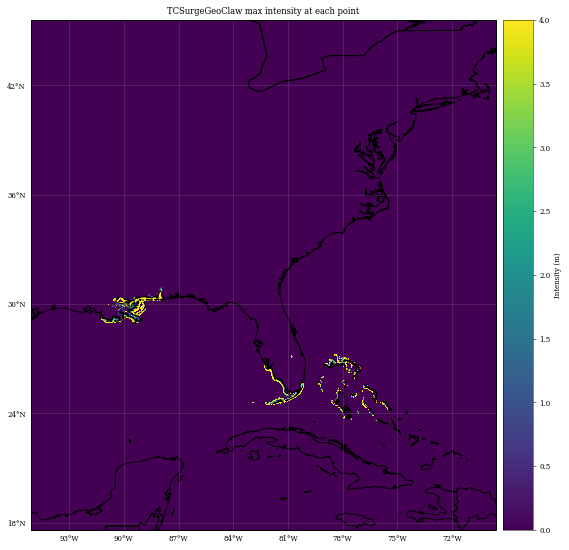

In [4]:
# The Hazard object can be used just like any other Hazard object, e.g.:
haz.plot_intensity(event=0, smooth=False, vmin=0, vmax=4)